# Connecting to MongoDB / Closing MongoDB

In [ ]:
from pymongo import *

#create a MongoDB instance called client
client = MongoClient()
# does the same thing as:
client = MongoClient("127.0.0.1", 27017)



client.close() #close and disconnect from MongoDB database

# Listing databases in server/client

In [ ]:
databases = client.list_database_names()
print("The databases in the MongoDB server are:", databases)

# Create/access database
##### Note that Collections and Databases in MongoDB are created lazily; The previous command have yet to actually perform any operations on the MongoDB server. The collections and databases will only be created when the first document is inserted into them

In [ ]:
db = client.get_database("DATABASE_NAME")
#e.g
db = client.get_database("class_info")

# Listing collections in database

In [ ]:
collections = db.list_collection_names()
print("The collections in the database are:", collections)

# Create/access a collection in database

In [ ]:
col = db.get_collection("Collection_Name")
#e.g
col = db.get_collection("teachers")

# Document

<h10>
- Documents are Json objects that live inside a collection <br>
- Each document contains key-value pairs (like python dictionary) where keys are fields and values are data associated with the fields <br>
- Each document is identified using a unique key <br>
- The _id field is automatically indexed when document is inserted into the database <br>
- IDs are are 12 byte BSON objects, NOT strings which is why we need the ObjectID function
<br>
<br>
{<br>
	“_id”: ObjectID(“5e9a568b12de6ebf44ce8ffe”), <br>
	“ID”: 1, <br>
	“Name”: “John”, <br>
	“Age”: 25 <br>
}
</h10>

# Insert document(s) in Collection

In [ ]:
document = 'a document'
documents = 'multiple documents'
col.insert_one(document)
col.insert_many(documents)

#e.g.--------------------------------------------------------------------

col.insert_one({"data1":"value1", "data2":"value2"})
#############################################################################
lst = [] #list of dictionary
lst.append({"name":"Mr Lim","subject":"Phy"})
lst.append({"name":"Mr Lee","subject":"Chem"})
lst.append({"name":"Mr Ong","subject":"Econs"})

col.insert_many(lst)
#############################################################################
from csv import *
file = open("textfile.txt")
documents = reader(file)
for data1, data2 in documents:
	col.insert_one({"data1":data1, "data2":data2})
file.close()
#############################################################################
from json import *
file = open("jsonfile.json")
documents = load(file)
col.insert_many(documents)


# Querying Document(s) in Collection

<h10>
The find() method returns a pymongo cursor object, which is a <br>
reference to the result set of a query. <br><br>
 1. Find all the documents <br>
Syntax: query = col.find() <br><br>
 2. Find all the documents fulfilling the criteria <br>
Syntax: query = col.find(criteria) <br><br>
 3. Display only certain fields <br>
Syntax: query = col.find({ }, field_display) <br><br>
 4. Find all the documents fulfilling the criteria and display only certain fields <br>
Syntax: query = col.find(criteria, field_display) <br><br>


Query methods like count(), sort(), limit() ... may be applied to the query object.<br>
Example : query.count()
</h10>

In [ ]:
query = col.find_one() 
'''
when we output query, we will get a dictionary containing all the
fields and their corresponding data
{'_id': ObjectID('its id'), 'field1':'data1', 'field2': 'data2'}
'''

query = col.find()
'''
find() creates a cursor object from the query and will find 
all the documents in the collection, col
'''

field_display = {'field1':0, 'field2':1, 'field3':0}
query = col.find({},field_display)
'''
fields corresponding to 1 will be included while those 
corresponding to 0 will not be included
'''


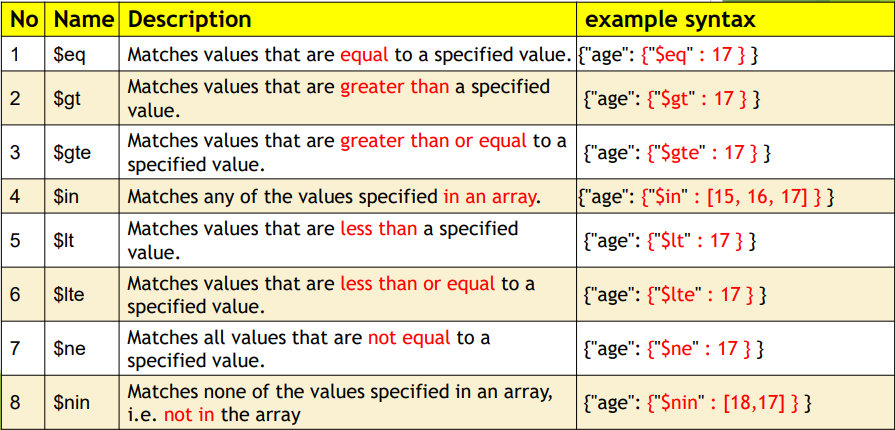
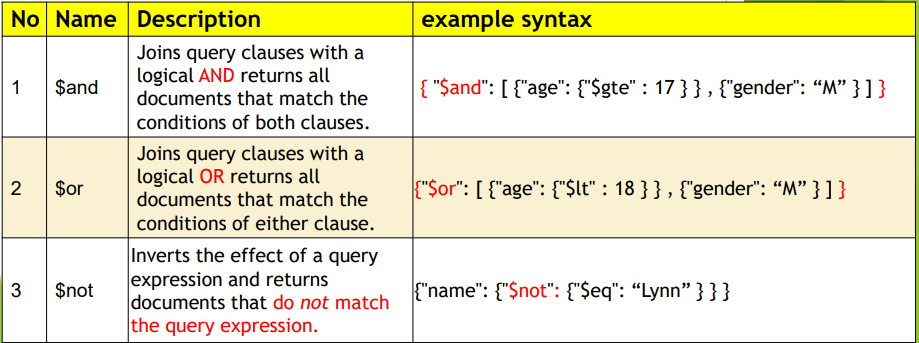

# Dropping a collection

In [ ]:
db.drop_collection("collectionName")